In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [159]:
df= pd.read_csv('Non_linear_SVM_Dataset.csv')

In [160]:
df.shape

(500, 3)

In [161]:
df.head()

,X1,X2,Y
0,0.830858,-0.334342,1.0
1,0.991710,0.879000,0.0
2,1.107245,-0.470344,1.0
3,-0.140899,1.033148,0.0
4,0.405592,1.328529,0.0


In [162]:
### missing values
df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [163]:
#### duplicates
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='X1', ylabel='X2'>

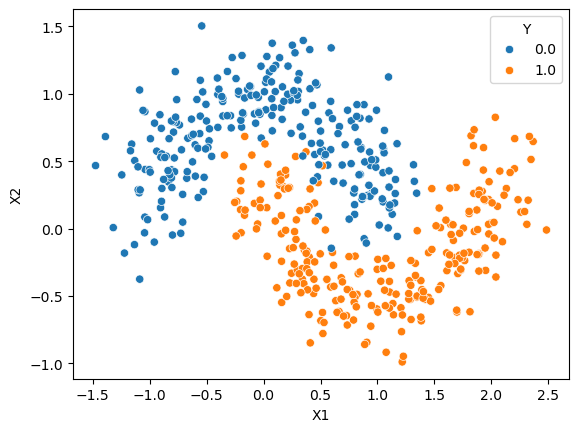

In [165]:
#plt.scatter(df.X1,df.X2,c=df.Y)
sns.scatterplot(x=df.X1,y=df.X2,hue=df.Y)

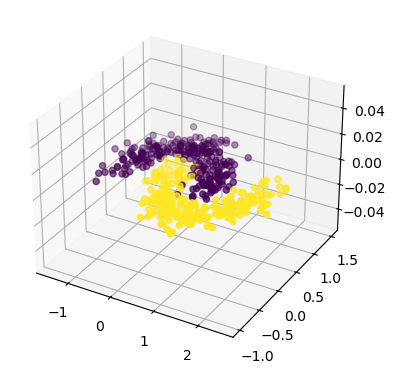

In [166]:
#### 3-D plot
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.scatter(df.X1,df.X2,c=df.Y)

In [172]:
target= df[['Y']]
features= df.drop(columns=['Y'])

In [173]:
#### splitting train_test
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100,stratify=df.Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375, 1)
(125, 1)


In [184]:
#### Model Building and validation
svc=SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
accuracy_score(y_test,y_pred)
y_pred

array([1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0.])

In [176]:
x_min=df.X1.min()-1
x_max=df.X1.max()+1
y_min= df.X2.min()-1
y_max= df.X2.max()+1
print(x_min,x_max,y_min,y_max)

-2.4761269392401806 3.48480165010424 -1.9885260706545684 2.5042788037105517


In [177]:
## step interval
h=0.02

In [178]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [179]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [188]:
x_test.shape

(125, 2)

In [215]:
xx

array([[-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
         3.46387306,  3.48387306],
       [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
         3.46387306,  3.48387306],
       [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
         3.46387306,  3.48387306],
       ...,
       [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
         3.46387306,  3.48387306],
       [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
         3.46387306,  3.48387306],
       [-2.47612694, -2.45612694, -2.43612694, ...,  3.44387306,
         3.46387306,  3.48387306]])

In [183]:
x_test

,X1,X2
487,0.327517,-0.475084
112,0.681948,-0.364564
491,2.334456,0.684586
4,0.405592,1.328529
217,-0.782111,0.422878
...,...,...
364,0.534771,0.540905
121,-0.674958,0.374085
497,0.345548,-0.128434
139,0.170705,0.314035


In [205]:
np.c_[np.ravel(xx),np.ravel(yy)]

array([[-2.47612694, -1.98852607],
       [-2.45612694, -1.98852607],
       [-2.43612694, -1.98852607],
       ...,
       [ 3.44387306,  2.49147393],
       [ 3.46387306,  2.49147393],
       [ 3.48387306,  2.49147393]])

In [199]:
z=svc.predict(np.c_[np.ravel(xx),np.ravel(yy)])

In [202]:
z

array([1., 1., 1., ..., 0., 0., 0.])

In [206]:
xx.shape

(225, 299)

In [207]:
yy.shape

(225, 299)

In [208]:
z.shape

(67275,)

In [211]:
z1=z.reshape(xx.shape)

In [212]:
z1.shape

(225, 299)

In [217]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

<Axes: xlabel='X1', ylabel='X2'>

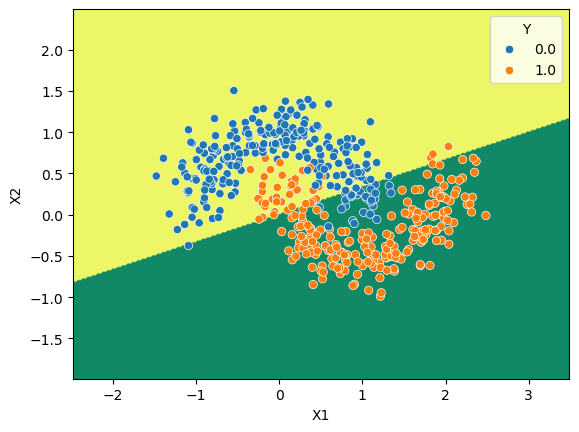

In [220]:
plt.contourf(xx,yy,z1,cmap='summer_r')
sns.scatterplot(x=df.X1,y=df.X2,hue=df.Y)